In [1]:
# https://www.kaggle.com/gzuidhof/full-preprocessing-tutorial

import numpy as np
import pandas as pd
import pydicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt
from matplotlib import patches
import SimpleITK as sitk
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from pathlib import Path
import json
from preproc import load_scan, resample

In [2]:
root = Path('/scratch/zc2357/cv/final/datasets/luna16')

with open(root / 'uid_to_subset.json') as f:
    uid_to_subset = json.load(f)

df = pd.read_csv(root / 'candidates_V2.csv')

In [3]:
df['class'].value_counts()

0    753418
1      1557
Name: class, dtype: int64

In [4]:
pos = df[df['class'] == 1]
case = pos[pos['seriesuid'] == '1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800']
sample = case.iloc[0]  # a really large 3cm nodule

uid = sample['seriesuid']
subset = uid_to_subset[uid]
path = root / subset / ('%s.mhd' % uid)

In [20]:
case

,seriesuid,coordX,coordY,coordZ,class
27912,1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331...,48.236753,37.477210,-98.642088,1
27931,1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331...,-64.462494,-70.162506,-98.750000,1
27972,1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331...,-62.899994,-60.006256,-101.250000,1
28246,1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331...,-55.087494,-66.256256,-101.250000,1
28271,1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331...,-60.411635,-65.607125,-100.300181,1
28387,1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331...,40.690000,32.190000,-97.150000,1
28543,1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331...,44.190000,37.790000,-107.010000,1
28591,1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331...,43.490000,40.590000,-87.290000,1
28650,1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331...,50.500000,27.280000,-107.010000,1
28860,1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331...,58.200000,35.690000,-102.080000,1


In [6]:
img, arr = load_scan(path.as_posix())
arr_iso, spacing_iso = resample(arr, img.GetSpacing())

In [7]:
def visualize_annotation(arr, origin, spacing, coord):
    origin = np.array(origin)
    spacing = np.array(spacing)
    coord = np.array(coord)
    idx = ((coord - origin) / spacing).round().astype(int)
    plt.figure(figsize=(24, 18))
    for i in range(48):
        z_offset = i - 24
        ax = plt.subplot(6, 8, i+1)
        rect = patches.Rectangle((idx[0]-24, idx[1]-24), 48, 48, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.imshow(arr[:,:,idx[2] + z_offset], cmap='gray')
    plt.show()

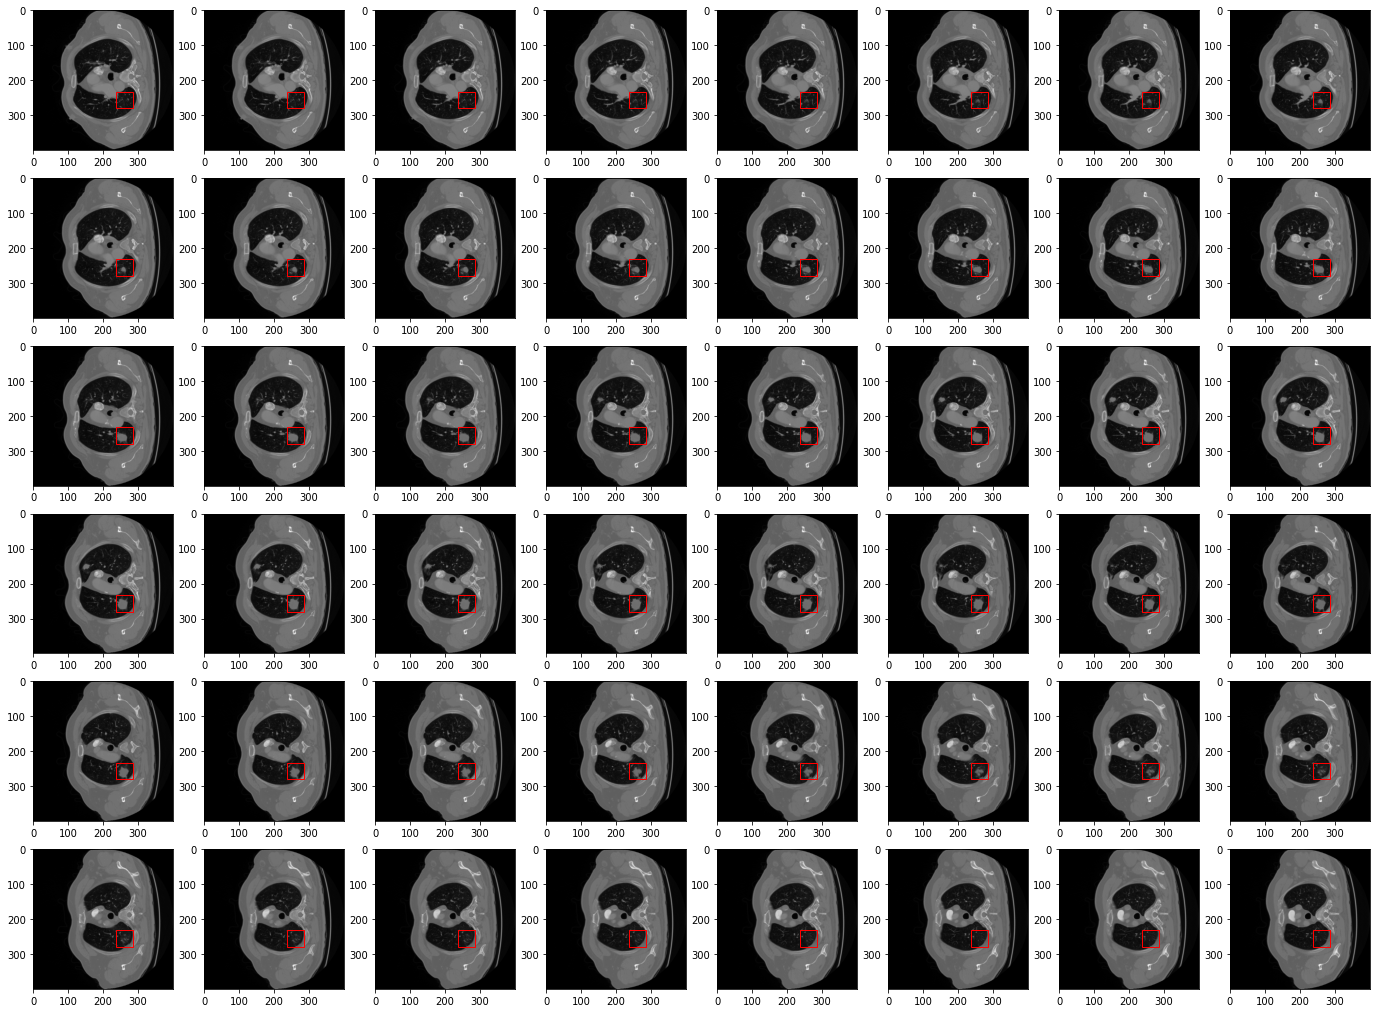

In [12]:
visualize_annotation(arr_iso, img.GetOrigin(), spacing_iso, (sample.coordX, sample.coordY, sample.coordZ))

In [15]:
nodule_coords = np.array([sample.coordX, sample.coordY, sample.coordZ])
origin = np.array(img.GetOrigin())
nodule_coords_iso = (nodule_coords - origin) / spacing_iso

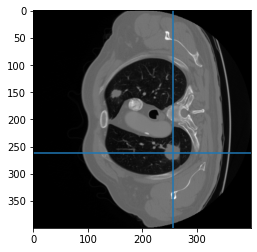

In [18]:
plt.figure()
plt.axhline(nodule_coords_iso[0])
plt.axvline(nodule_coords_iso[1])
plt.imshow(arr_iso[:, :, 284], cmap='gray')
plt.show()